In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\USER\Desktop\Churn_Modelling .csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
import matplotlib.pyplot as mtp  

In [37]:
x= data['Age']
y= data['CreditScore']
df = pd.get_dummies

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,test_size = 0.3, random_state = 100)
 

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
#Buidling the training Model

In [41]:
#Building the training Model using statsmodel.api

In [42]:
import statsmodels.api as statsM


In [43]:
#Adding constant to get an intercept
train_statsM=statsM.add_constant(X_train)

In [45]:
lr = statsM.OLS(y_train.astype(float), train_statsM.astype(float)).fit()
lr.params

const    649.879921
Age        0.002685
dtype: float64

In [46]:
#Checking the summary
lr.summary


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000029E1F9955E0>>

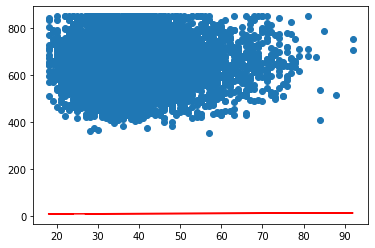

In [49]:
//Visualising data
mtp.scatter(X_train, y_train)
mtp.plot(X_train, 6.948 + 0.054*X_train, 'r')
mtp.show()

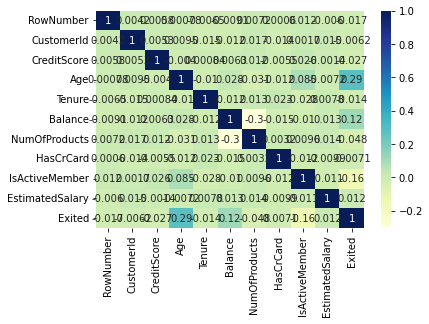

In [51]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
mtp.show()

In [53]:
#After fitting the training data
#working on the test data


In [55]:
xtest=statsM.add_constant(X_test)

In [56]:
# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(xtest)

# Printing the first 15 predicted values
y_test_pred

8018    649.941686
9225    649.965855
3854    649.968541
2029    649.968541
3539    649.992710
           ...    
4208    649.998081
5335    649.984654
2554    649.960484
13      649.947057
4468    649.984654
Length: 3000, dtype: float64

In [57]:
#calculate the R² value for the above-predicted y-values.
#can do that by merely importing the r2_score library from sklearn.metrics
#package.



In [58]:
from sklearn.metrics import r2_score

In [59]:
r2= r2_score(y_test, y_test_pred)
r2

-0.0003490640425953817

In [60]:
#Negative r-Squared means that the model makes no sense----
#Poor...


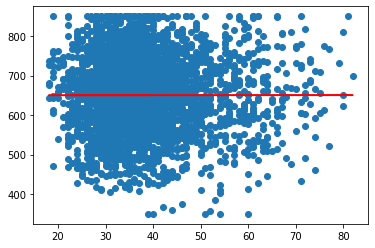

In [61]:
mtp.scatter(X_test, y_test)
mtp.plot(X_test, y_test_pred, 'r')
mtp.show()

In [63]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7,test_size = 0.3, random_state = 100)
 

In [64]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(7000, 1)
(3000, 1)


In [65]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [66]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 649.8799205380577
Slope : [0.00268546]


In [67]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

8.672868689885149e-08
-0.0003490640425958258


In [ ]:
#Conclusion
R² train_data = 0.816
R² test_data = 0.792



#Thankyou..